# Pandas: Data manipulation

In [1]:
import pandas as pd

In [2]:
data = {"students":["Adam", "Monica", "John"], #Create a simple data via dictionary
     "born":[1994, 1989, 2011],
     "academic degree":[None,"Bc.","MSc."],
     "active":[True,False,False]}


In [3]:
data

{'academic degree': [None, 'Bc.', 'MSc.'],
 'active': [True, False, False],
 'born': [1994, 1989, 2011],
 'students': ['Adam', 'Monica', 'John']}

In [4]:
df = pd.DataFrame(data) #transform data to pandas DataFrame

In [5]:
df

,academic degree,active,born,students
0,None,True,1994,Adam
1,Bc.,False,1989,Monica
2,MSc.,False,2011,John


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df["children"] = [0,1,2] #add a new column "children"

In [8]:
df

,academic degree,active,born,students,children
0,None,True,1994,Adam,0
1,Bc.,False,1989,Monica,1
2,MSc.,False,2011,John,2


In [9]:
#create new data, which we want to append to DataFrame
new_students =  {
                "students":["Clara", "Johny", "Michael"],
                "born":[1984, 1989, 1920],
                "academic degree":["PhD.","Bc.","MSc."],
                "active":[True,False,False],
                "children":[2,0,4]
                }


In [10]:
df = df.append(pd.DataFrame(new_students), sort = False) #append the data

In [11]:
df #notice the index values

,academic degree,active,born,students,children
0,None,True,1994,Adam,0
1,Bc.,False,1989,Monica,1
2,MSc.,False,2011,John,2
0,PhD.,True,1984,Clara,2
1,Bc.,False,1989,Johny,0
2,MSc.,False,1920,Michael,4


In [12]:
df.reset_index(inplace = True, drop = True) #Reset index values. Inplace rewrites df in place...
                                            #...without creating a copy as a new object
                                            #drop = false would insert a column "index"

In [13]:
df.drop(columns=["active", "children"]) #delete columns

,academic degree,born,students
0,None,1994,Adam
1,Bc.,1989,Monica
2,MSc.,2011,John
3,PhD.,1984,Clara
4,Bc.,1989,Johny
5,MSc.,1920,Michael


In [14]:
df.drop([1]) #delete second row

,academic degree,active,born,students,children
0,None,True,1994,Adam,0
2,MSc.,False,2011,John,2
3,PhD.,True,1984,Clara,2
4,Bc.,False,1989,Johny,0
5,MSc.,False,1920,Michael,4


### Accesing one column

In [15]:
born = df["born"].values #.values returns a numpy array
print(born)
type(born)

[1994 1989 2011 1984 1989 1920]


numpy.ndarray

In [16]:
degrees = df["academic degree"].values
print(degrees)
type(degrees)

[None 'Bc.' 'MSc.' 'PhD.' 'Bc.' 'MSc.']


numpy.ndarray

### Accesing one row

In [17]:
monica = df.iloc[1] #iloc means integer location
print(monica)
type(monica)
list(monica) #make a list of monica data

academic degree       Bc.
active              False
born                 1989
students           Monica
children                1
Name: 1, dtype: object


['Bc.', False, 1989, 'Monica', 1]

In [18]:
monica = df.loc[df["students"]=="Monica"] #acces a row via boolean expression
monica


,academic degree,active,born,students,children
1,Bc.,False,1989,Monica,1


### Accesing one element

In [19]:
df.iloc[1,2] #integer location again

1989

In [20]:
df.loc[df["students"]=="Monica","born"] #boolean location again


1    1989
Name: born, dtype: int64

In [21]:
df.loc[df["students"]=="Monica","born"].values #get a value of an element

array([1989])

### Operations with DataFrame

In [22]:
df.describe()#returns basic statistics of numerical data in DataFrame

,born,children
count,6.000000,6.000000
mean,1981.166667,1.500000
std,31.390551,1.516575
min,1920.000000,0.000000
25%,1985.250000,0.250000
50%,1989.000000,1.500000
75%,1992.750000,2.000000
max,2011.000000,4.000000


In [23]:
df.mean()

active         0.333333
born        1981.166667
children       1.500000
dtype: float64

In [24]:
df.std()

active       0.516398
born        31.390551
children     1.516575
dtype: float64

In [25]:
df.max()

active         1.0
born        2011.0
children       4.0
dtype: float64

In [26]:
df.children.mean()

1.5

In [27]:
#Accesing specific data via boolean expression - mask
mask = df["born"] > df["born"].mean()
mask

0     True
1     True
2     True
3     True
4     True
5    False
Name: born, dtype: bool

In [28]:
df[mask]

,academic degree,active,born,students,children
0,None,True,1994,Adam,0
1,Bc.,False,1989,Monica,1
2,MSc.,False,2011,John,2
3,PhD.,True,1984,Clara,2
4,Bc.,False,1989,Johny,0


In [29]:
df.sort_values(["children"]) #sorting data by number of children

,academic degree,active,born,students,children
0,None,True,1994,Adam,0
4,Bc.,False,1989,Johny,0
1,Bc.,False,1989,Monica,1
2,MSc.,False,2011,John,2
3,PhD.,True,1984,Clara,2
5,MSc.,False,1920,Michael,4


In [30]:
df.sort_values(["children"], ascending = False) #descending

,academic degree,active,born,students,children
5,MSc.,False,1920,Michael,4
2,MSc.,False,2011,John,2
3,PhD.,True,1984,Clara,2
1,Bc.,False,1989,Monica,1
0,None,True,1994,Adam,0
4,Bc.,False,1989,Johny,0


In [31]:
df.sort_values(["children","born"], ascending = [True, False]) #sorting by 2 categories

,academic degree,active,born,students,children
0,None,True,1994,Adam,0
4,Bc.,False,1989,Johny,0
1,Bc.,False,1989,Monica,1
2,MSc.,False,2011,John,2
3,PhD.,True,1984,Clara,2
5,MSc.,False,1920,Michael,4


### Reading CSV

In [33]:
#there are many options in read_csv, study the documentation
url = 'https://raw.githubusercontent.com/mathcoder3141/blog-data-files/master/Congress_White_House.csv'
data = pd.read_csv(url,index_col = 0)

In [34]:
data.head(10) # if we have large data, watch only few rows with .head()

,Employee Status,Salary,Pay Basis,Position Title
Employee Name,,,,
"Abrams, Adam W.",Employee,66300.0,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR
"Adams, Ian H.",Employee,45000.0,Per Annum,EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDUL...
"Agnew, David P.",Employee,93840.0,Per Annum,DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS
"Albino, James",Employee,91800.0,Per Annum,SENIOR PROGRAM MANAGER
"Aldy, Jr., Joseph E.",Employee,130500.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY ...
"Alley, Hilary J.",Employee,42000.0,Per Annum,STAFF ASSISTANT
"Amorsingh, Lucius L.",Employee,56092.0,Per Annum,SPECIAL ASSISTANT
"Anderson, Amanda D.",Employee,60000.0,Per Annum,SPECIAL ASSISTANT TO THE CHIEF OF STAFF
"Anderson, Charles D.",Employee,51000.0,Per Annum,POLICY ASSISTANT


In [35]:
data.describe() 

,Salary
count,469.000000
mean,82721.336887
std,41589.433381
min,0.000000
25%,45900.000000
50%,66300.000000
75%,113000.000000
max,179700.000000


In [36]:
mask = data["Salary"] == data["Salary"].max() #who has the biggest salary?
data[mask]

,Employee Status,Salary,Pay Basis,Position Title
Employee Name,,,,
"Hash, Michael M.",Detailee,179700.0,Per Annum,DEPUTY DIRECTOR
"Love, Timothy P.",Detailee,179700.0,Per Annum,POLICY DIRECTOR


### Regression

In [75]:
import matplotlib.pyplot as plt
import numpy as np

In [76]:
#Import data
data_tests = pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/testy.csv") 
data_confirmed = pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/nakaza.csv")

In [77]:
data_confirmed.head()

,datum,pocet_den,pocet_celkem
0,2020-01-27,0,0
1,2020-01-28,0,0
2,2020-01-29,0,0
3,2020-01-30,0,0
4,2020-01-31,0,0


In [80]:
#regression using polyfit
x = data_tests.testy_den.values
y = data_confirmed.pocet_den.values[0:-1]
a, b = np.polyfit(x,y,1) #1 means linear regression, 2 quadratic etc..

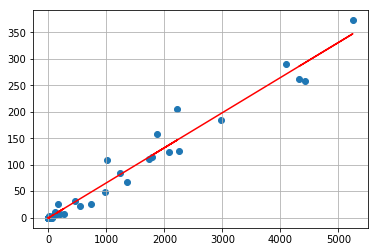

In [82]:
plt.scatter(x,y) #scatter plot of data
plt.plot(x,a*x+b,"r") #plot the regression
plt.grid(True)
plt.show()